<a href="https://colab.research.google.com/github/Malekkamoua/Machine-learning/blob/main/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nous avons choisi de travailler avec Doc2vec puisqu'il a donné des resultats meilleurs que word2vec.
NB: Ce code traite 2000/103.000 fichiers de données non supervisées.

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

In [ ]:
import os
len([item for item in os.listdir("/content/gdrive/MyDrive/alldata")])

In [ ]:
import os 
from shutil import copyfile

for dir in os.listdir("/content/gdrive/MyDrive/unzipped/content/content"):
  for file in os.listdir(f"/content/gdrive/MyDrive/unzipped/content/content/{dir}"):
    copyfile(f"/content/gdrive/MyDrive/unzipped/content/content/{dir}/{file}",f"/content/gdrive/MyDrive/alldata/{file}")


In [ ]:
#Extract 1
from zipfile import ZipFile

with ZipFile('/content/gdrive/MyDrive/PFA DATA/preprocessed_data/preprocessed_data_part1.zip', 'r') as zipObj:
  zipObj.extractall()

print('Done extracting folder.')

In [ ]:
path = "/content/content/content/preprocessed_data_part1"

In [ ]:
import os

all_files = 0
for root, dirs, files in os.walk(path, topdown=False):
    all_files += len(files)

print(all_files)

In [ ]:
#Read extracted folders
import os

for root, dirs, files in os.walk(path, topdown=False):
  print(files)

In [ ]:
pip install nltk==3.4.5


In [ ]:
import nltk
nltk.download('punkt')

In [ ]:
import re
import string
import nltk  
from nltk.tokenize import word_tokenize 

In [ ]:
# iterate through all files
doc = []
for file in os.listdir(path):
    if file.endswith(".txt"):
        file_path = f"{path}/{file}"
        with open(file_path, 'r') as f:
          doc.append(f.readline())

doc

In [ ]:
from nltk.corpus import stopwords
from nltk import word_tokenize

# Preparing the dataset
sentences = [nltk.word_tokenize(sentence) for sentence in doc]

sentences

In [ ]:
#Import all the dependencies
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from nltk.tokenize import word_tokenize

In [ ]:
documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(sentences)]
 
documents

In [ ]:
max_epochs = 2
vec_size = 20
alpha = 0.025

model = Doc2Vec(vector_size=vec_size,
                alpha=alpha, 
                min_alpha=0.00025,
                min_count=1,
                dm =1)
  
model.build_vocab(documents)

for epoch in range(max_epochs):
    print('iteration {0}'.format(epoch))
    model.train(documents,
                total_examples=model.corpus_count,
                epochs=model.iter)
    # decrease the learning rate
    model.alpha -= 0.0002
    # fix the learning rate, no decay
    model.min_alpha = model.alpha

model.save("d2v.model")
print("Model Saved")

In [ ]:
print(len(model.docvecs))
print(len(model.wv.vocab))


In [ ]:
model.wv.most_similar("war")

[('history', 0.979277491569519),
 ('latérale', 0.9779210090637207),
 ('rule', 0.9776740074157715),
 ('reason', 0.9771270751953125),
 ('percent', 0.9768942594528198),
 ('death', 0.9750916957855225),
 ('klapper', 0.9746840000152588),
 ('number', 0.9743877053260803),
 ('never', 0.9740463495254517),
 ('law', 0.9738461375236511)]

In [ ]:
#Imports the libraries and read the data files
import random
import re
from nltk.stem.snowball import SnowballStemmer
import os
import gensim
from gensim.models import Doc2Vec
from nltk.corpus import stopwords
import nltk
import matplotlib
from sklearn.cluster import KMeans
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import matplotlib.cm as cm

In [ ]:
d2v_model = model

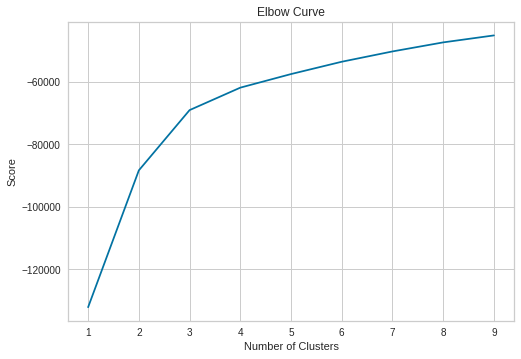

In [ ]:
#Elbow Method

nc = range(1,10)
kmeans = []
score = []
kmeans = [KMeans(n_clusters = i, n_init = 100, max_iter = 500, precompute_distances = 'auto' ) for i in nc]               
score = [kmeans[i].fit(d2v_model.docvecs.vectors_docs).score(d2v_model.docvecs.vectors_docs) for i in range(len(kmeans))]

# Plot the elbow
plt.plot(nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()


In [ ]:
d2v_model.train(documents, total_examples=d2v_model.corpus_count, epochs=50, start_alpha=0.002, end_alpha=-0.016)

In [ ]:
#Clusters = 7 is the optimal number.
K_value = 7
kmeans_model = KMeans(n_clusters = K_value, init='k-means++', n_init = 2000, max_iter = 6000, precompute_distances = 'auto')  
X = kmeans_model.fit(d2v_model.docvecs.vectors_docs )
labels=kmeans_model.labels_.tolist()
clusters = kmeans_model.fit_predict(d2v_model.docvecs.vectors_docs )


#PCA
l = kmeans_model.fit_predict(d2v_model.docvecs.vectors_docs)
pca = PCA(n_components=2).fit(d2v_model.docvecs.vectors_docs)
datapoint = pca.transform(d2v_model.docvecs.vectors_docs)


In [ ]:
#GRAPH
#"""**Plot the clustering result**"""

plt.figure(figsize=(15,10))
label1 = ["#003049","#d62828","#f77f00","#fcbf49","#eae2b7","#8ecae6","#219ebc","#023047","#ffb703","#fb8500","#5f0f40","#ecc8af","#e7ad99","#ce796b","#c18c5d","#495867","#9a031e","#fb8b24","#e36414","#0f4c5c"]
print(len(label1))
color = [label1[i] for i in labels]
plt.scatter(datapoint[:, 0], datapoint[:, 1], c=color)

centroids = kmeans_model.cluster_centers_
centroidpoint = pca.transform(centroids)
plt.scatter(centroidpoint[:, 0], centroidpoint[:, 1], marker='^', s=150, c='#000000')
plt.show()



```
Resultat clustering dans l'intervalle (4,8)
```



Clusters = 4
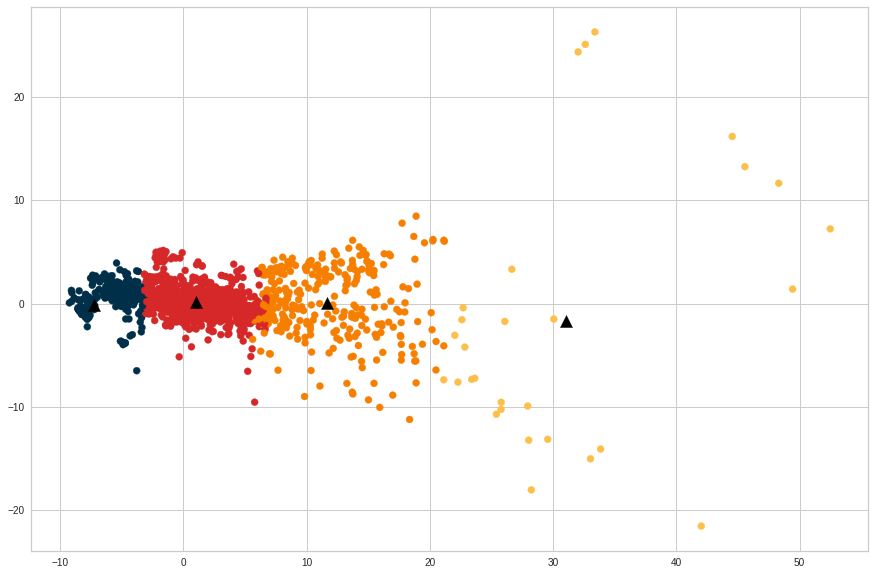 
Clusters = 5
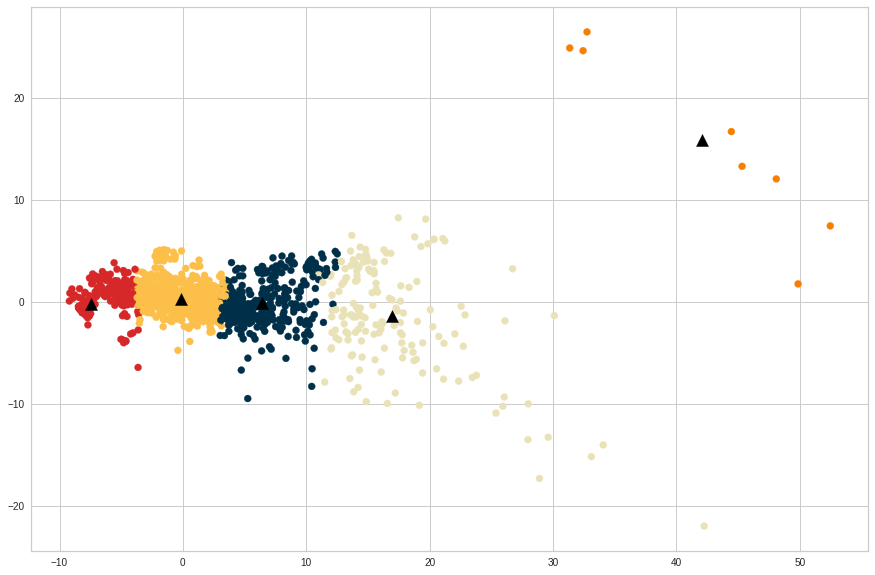
Clusters = 6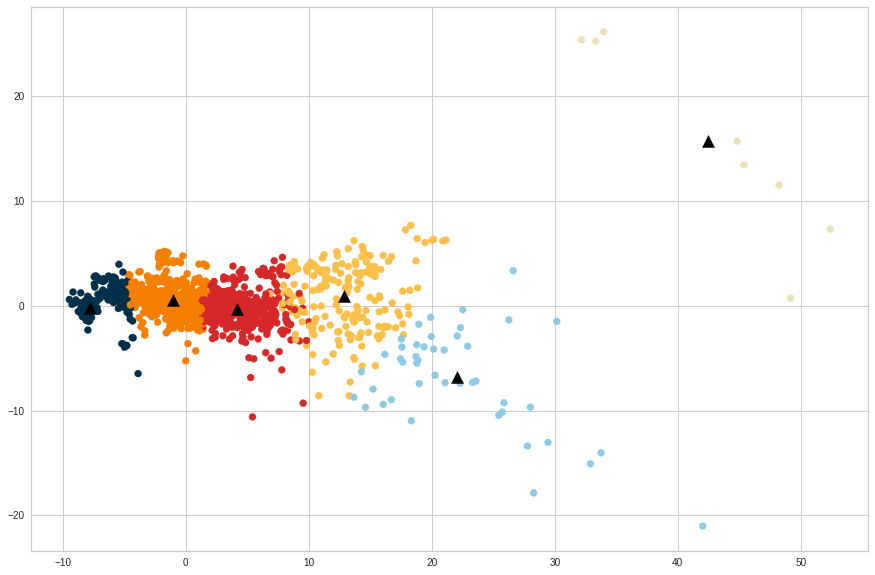
Clusters = 7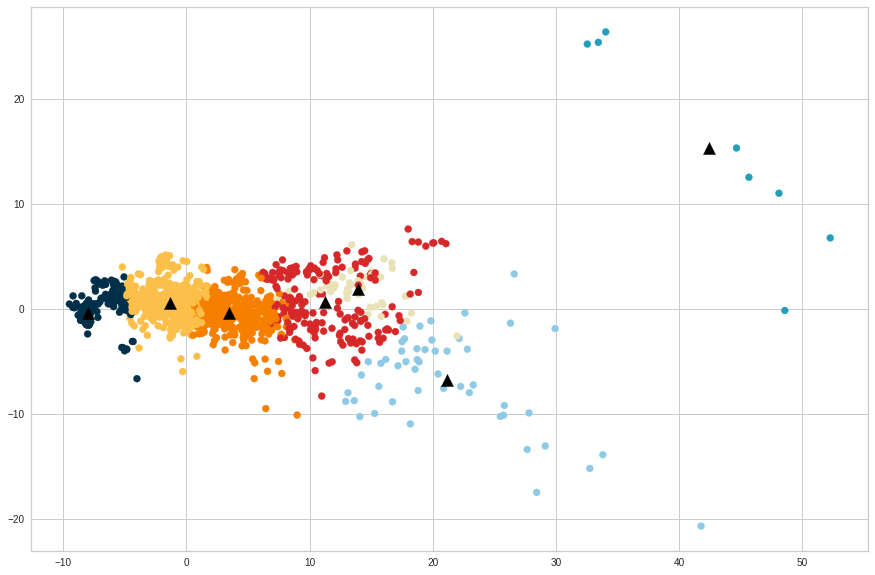
Clusters = 8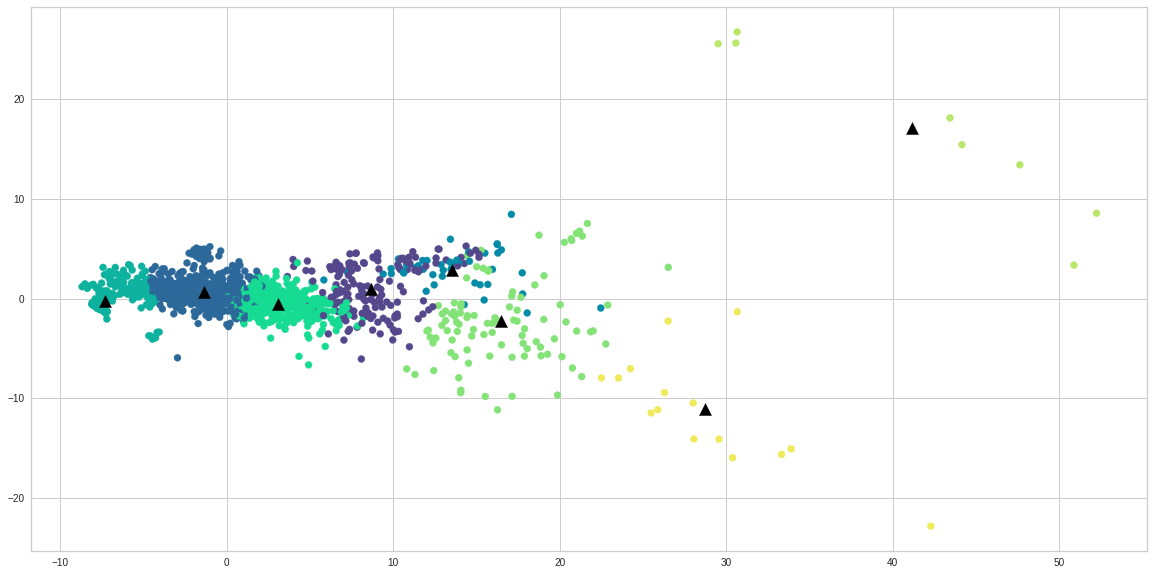